In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt

from mcopt.util.io import load_complex
from mcopt.morse_graph import (
  MorseGraph,
  attribute_cost_mat,
  color_by_position
)
from mcopt.opt import fpGW

from ot_param_comp import param_comp

In [2]:
profiles = [
  {
    'weight': 'adj',
    'hist': 'unif',
    'title': 'Uniform Histogram & Adjacency Matrix'
  },
  {
    'weight': 'path_length',
    'hist': 'unif',
    'title': 'Uniform Histogram & Path Length Matrix',
  },
  {
    'weight': 'geo_dist',
    'hist': 'unif',
    'title': 'Uniform Histogram & Geodesic Length Matrix',
  },
  
  {
    'weight': 'adj',
    'hist': 'deg',
    'title': 'Degree Histogram & Adjacency Matrix'
  },
  {
    'weight': 'path_length',
    'hist': 'deg',
    'title': 'Degree Histogram & Path Length Matrix',
  },
  {
    'weight': 'geo_dist',
    'hist': 'deg',
    'title': 'Degree Histogram & Geodesic Length Matrix',
  },
]

# Load Morse Complex

In [3]:
mc = load_complex('../gen_data/complex')
mc_noisy = load_complex('../gen_data/complex_noisy')

# Construct Morse Graph

In [4]:
mg = MorseGraph.from_complex(mc).sample(5, mode='geo_dist')

mg_noisy = MorseGraph.from_complex(mc_noisy).sample(5, mode='geo_dist')

## Initial Graphs

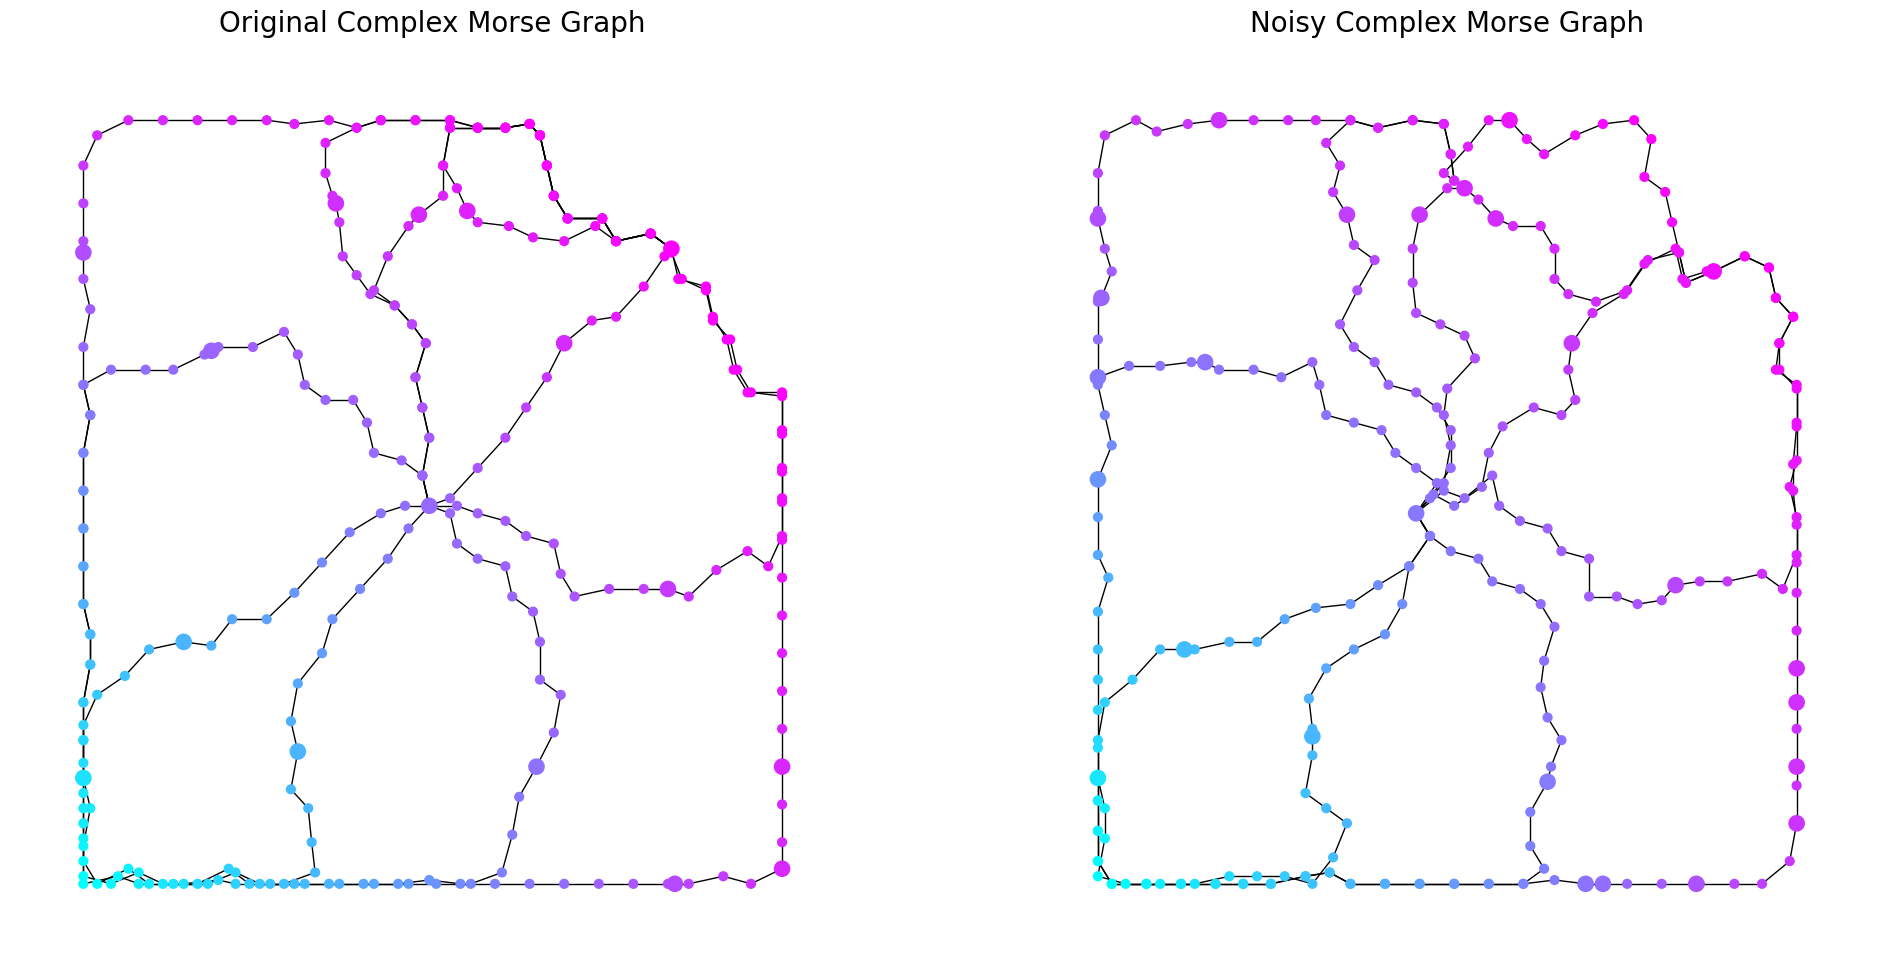

In [5]:
fig, axis = plt.subplots(1, 2, figsize=(24, 12))
cmap = 'cool'

mg.draw(ax=axis[0], node_size=40, cmap=cmap)
axis[0].set_title('Original Complex Morse Graph', fontsize=20)

mg_noisy.draw(ax=axis[1], node_size=40, cmap=cmap)
axis[1].set_title('Noisy Complex Morse Graph', fontsize=20)

plt.show()

# Run Gromov-Wasserstein Optimal Transport

In [6]:
mg_node_color = color_by_position(mg)

In [12]:
M = attribute_cost_mat(mg, mg_noisy)
m = 0.90

def run(mg_net, mg_noisy_net, _profile, G0):
  return fpGW(mg_net, mg_noisy_net, m, M, G0=G0)

In [46]:
param_comp(
  profiles, 
  run, 
  mg, 
  mg_noisy, 
  mg_node_color,
  random_state=42,
  n_iter=10
)

In [47]:
[col.max() for col in profiles[1]['coupling'].T]

[0.0034364261168384536,
 0.0021508566343048678,
 0.0034364261168384536,
 0.002472249004960503,
 0.0034364261168364834,
 0.0032757299315174953,
 0.0034364261168369605,
 0.003436426116837279,
 0.0034364261168125954,
 0.0032757299314931303,
 0.003436426116837377,
 0.0034364261168352106,
 0.0034364261168350514,
 0.0034364261168350514,
 0.0034364261168352106,
 0.0034364261168384536,
 0.0034364261168384536,
 0.002793641375559001,
 0.0034364261168384536,
 0.0034364261168350514,
 3.2430838834087002e-15,
 3.2430838834087002e-15,
 0.0034364261168384536,
 3.4021731068753015e-15,
 0.0034364261168384536,
 0.0034364261168363243,
 0.0034364261168384536,
 0.0032757299313780843,
 0.0034364261168384536,
 0.0034364261168384536,
 0.00118915177125078,
 0.0034364261168191427,
 0.0019283542238127203,
 0.0034364261168384536,
 0.003436426116837181,
 0.0034364261168384536,
 0.0034364261168384536,
 0.0034364261168384536,
 0.0023115528196168316,
 0.0034364261168384536,
 0.002410442779784578,
 0.003436426116822545

# Results

In [48]:
cmap = 'cool'
fontsize=30
node_size=40

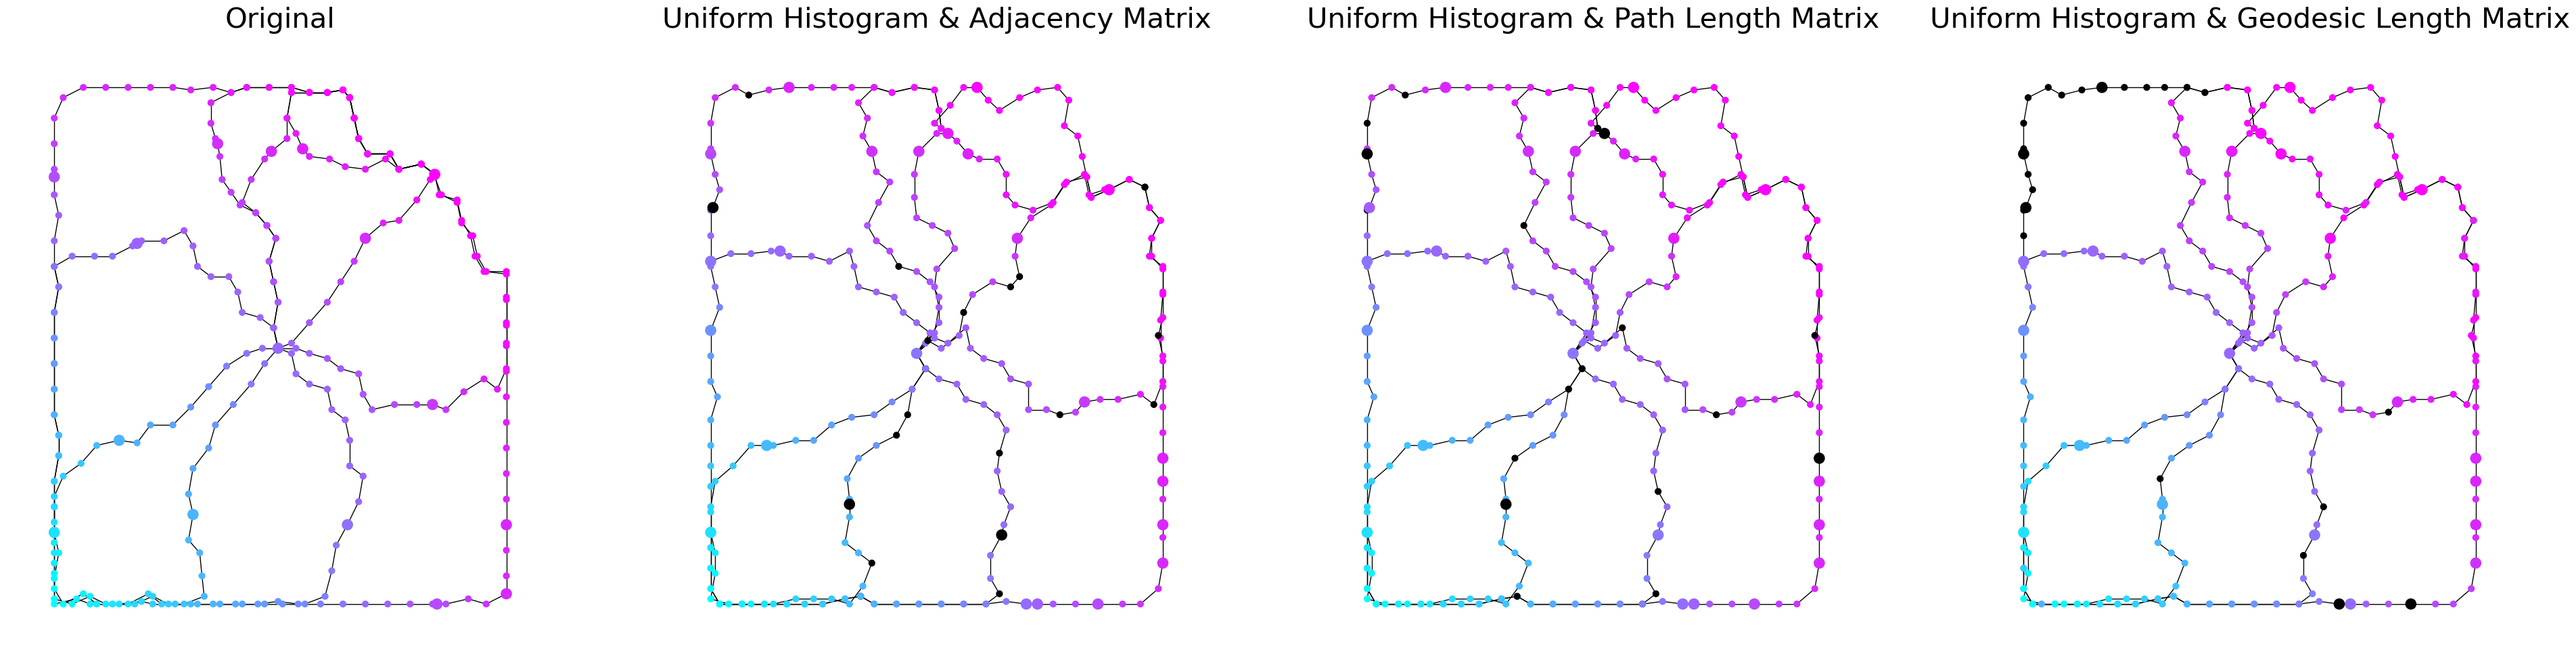

In [49]:
fig, axes = plt.subplots(1, 4, figsize=(48, 12))

mg.draw(
  ax=axes[0],
  node_size=node_size,
  node_color=mg_node_color,
  cmap=cmap
)
axes[0].set_title('Original', fontsize=fontsize)

for i, profile in enumerate(profiles[:3]):
  mg_noisy.draw(
    ax=axes[i + 1],
    node_size=node_size,
    node_color=profile['node_color'],
    cmap=cmap
  )
  
  axes[i + 1].set_title(profile['title'], fontsize=fontsize)

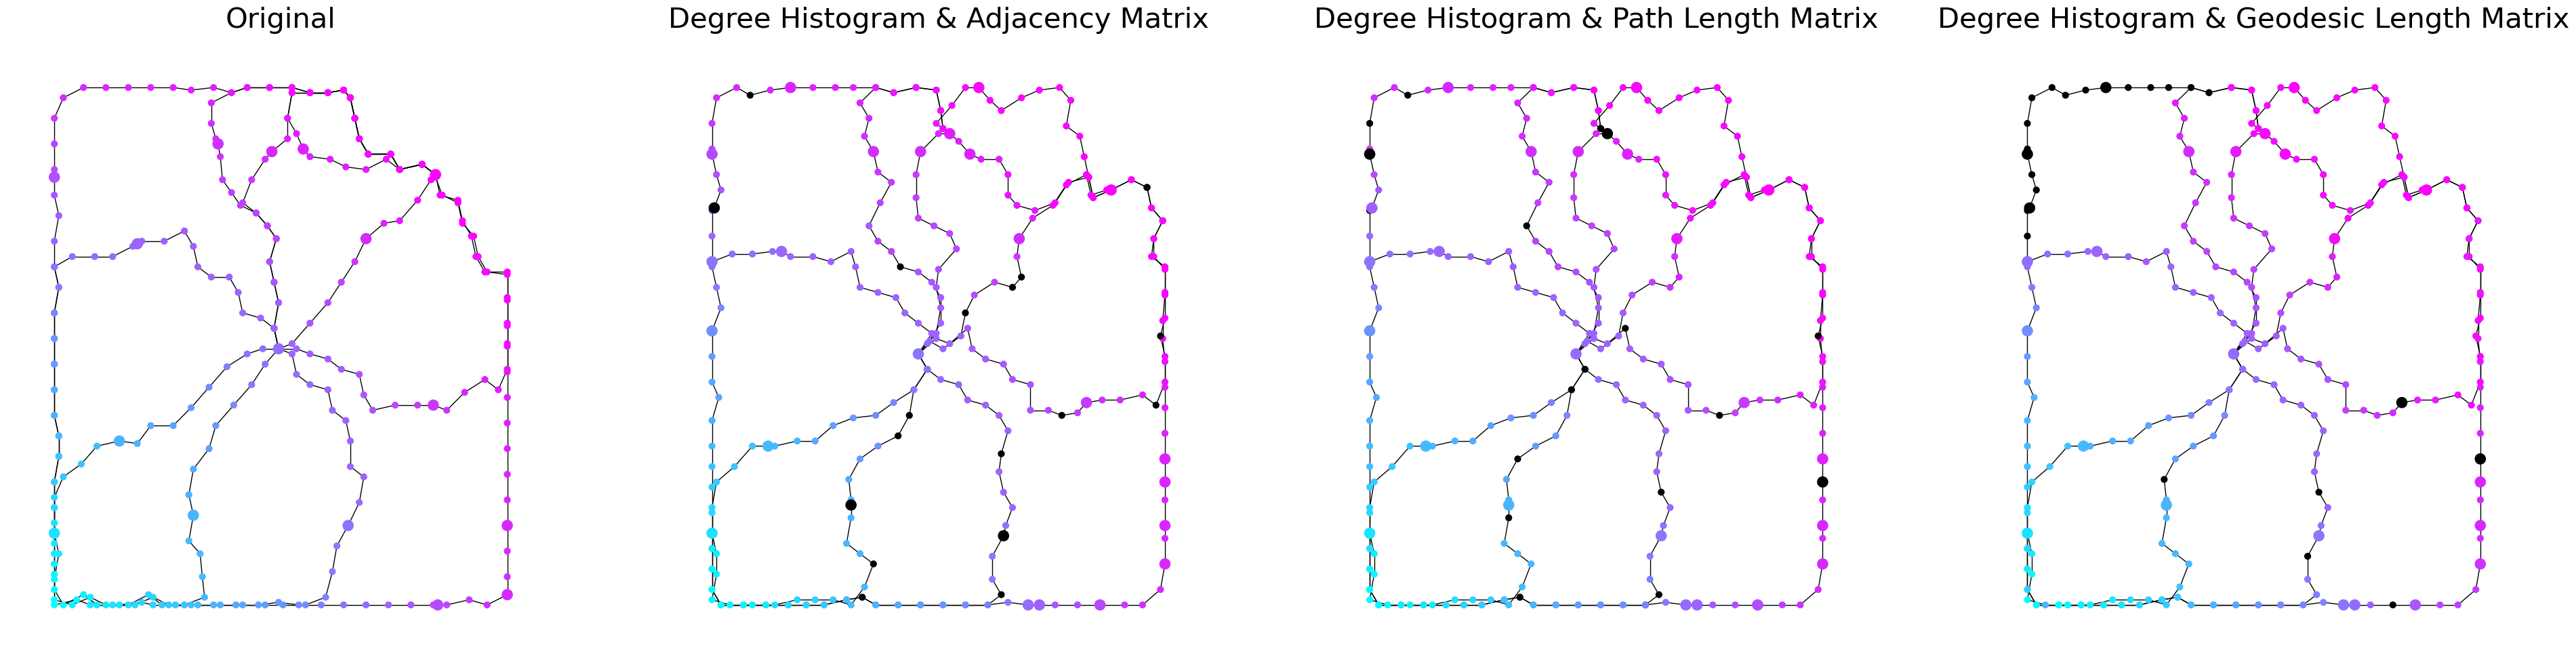

In [50]:
fig, axes = plt.subplots(1, 4, figsize=(48, 12))

mg.draw(
  ax=axes[0],
  node_size=node_size,
  node_color=mg_node_color,
  cmap=cmap
)
axes[0].set_title('Original', fontsize=fontsize)

for i, profile in enumerate(profiles[3:]):
  mg_noisy.draw(
    ax=axes[i + 1],
    node_size=node_size,
    node_color=profile['node_color'],
    cmap=cmap
  )
  
  axes[i + 1].set_title(profile['title'], fontsize=fontsize)